## Setting

In [1]:
# 작업 폴더 설정
%cd /home/yoo/works/CGD

/home/yoo/works/CGD


## Dataset Setting

In [3]:
# 불필요한 폴더로 설정한 폴더를 제외하고 search_path 하위에 있는 폴더 내 이미지 파일의 목록을 텍스트 파일로 저장
# 코드가 반복문을 이중으로 쓰고 있어서 효율화할 필요가 있음(!!!)

import os
import numpy as np

search_path = 'data/custom'
except_dirs = ['backup', 'uncropped'] # 검색에서 제외할 폴더명

with open(f"{search_path}/test.txt", 'w') as txt:
    txt.write("image_id\tclass_id\tsuper_class_id\tpath")
    
    classes = []
    files = []

    dirs = [dir for dir in os.listdir(search_path) if dir not in except_dirs and os.path.isdir(os.path.join(search_path, dir))]

    for dir in dirs:
        read_path = os.path.join(search_path, dir)
        for dp, dn, filenames in os.walk(read_path):
            for f in filenames:
                if f.endswith(('.jpg', '.JPG')): # 확장자가 jpg 또는 JPG 파일 대상
                    files.append(os.path.join(dp, f))

    files.sort()

    # class_ids = sorted(set(os.path.basename(f).split('_')[0] for f in files))
    class_ids = sorted(set(f.split('_')[0] for f in files))

    for image_id, path in enumerate(files, 1):

        # class_id = class_ids.index(os.path.basename(path).split('_')[0]) + 1
        class_id = class_ids.index(path.split('_')[0]) + 1

        txt.write("\n")
        txt.write(f"{image_id}\t{class_id}\t_\t{path}")

In [2]:
# 위하고 동일하나 전체 데이터를 train/test 8:2 비율로 나눠서 train.txt와 test.txt에 저장하는 코드

import os
import numpy as np
from sklearn.model_selection import train_test_split

# search_path = 'data/custom'
search_path = 'data/danawa'
except_dirs = ['backup', 'uncropped'] # 검색에서 제외할 폴더명

classes = []
files = []

dirs = [dir for dir in os.listdir(search_path) if dir not in except_dirs and os.path.isdir(os.path.join(search_path, dir))]

for dir in dirs:
    read_path = os.path.join(search_path, dir)
    for dp, dn, filenames in os.walk(read_path):
        for f in filenames:
            if f.endswith(('.jpg', '.JPG')): # 확장자가 jpg 또는 JPG 파일 대상
                files.append(os.path.join(dp, f))

files.sort()

# class_ids = sorted(set(os.path.basename(f).split('_')[0] for f in files))
class_ids = sorted(set(os.path.dirname(f) for f in files))

train_ids, test_ids = train_test_split(class_ids, test_size = 0.2, shuffle = True, random_state = 1021)
train_txt, test_txt = [], []

image_id, class_id, ex_dir_name = 0, 0, ''

for path in files:

    dir_name = os.path.dirname(path)
    
    if dir_name in train_ids:
        image_id += 1
        if dir_name != ex_dir_name:
            class_id += 1
        train_txt.append(f"{image_id}\t{class_id}\t_\t{path}")

    ex_dir_name = dir_name

for path in files:

    dir_name = os.path.dirname(path)
    
    if dir_name in test_ids:
        image_id += 1
        if dir_name != ex_dir_name:
            class_id += 1
        test_txt.append(f"{image_id}\t{class_id}\t_\t{path}")

    ex_dir_name = dir_name

with open(f"{search_path}/train.txt", 'w') as txt:
    txt.write("image_id\tclass_id\tsuper_class_id\tpath")

    for line in train_txt:
        txt.write("\n")
        txt.write(line)

with open(f"{search_path}/test.txt", 'w') as txt:
    txt.write("image_id\tclass_id\tsuper_class_id\tpath")

    for line in test_txt:
        txt.write("\n")
        txt.write(line)

In [ ]:
# 텍스트 파일에서 경로명을 변경해야 하는 경우 사용하는 함수
def replace_in_file(file_path, old_str, new_str):

    # 파일 읽어들이기
    fr = open(file_path, 'r')
    lines = fr.readlines()
    fr.close()
    
    # old_str -> new_str 치환
    fw = open(file_path, 'w')
    for line in lines:
        fw.write(line.replace(old_str, new_str))
    fw.close()

# 호출: txt 파일에서 특정 내용을 대치
replace_in_file("data/custom/test.txt", "bicycle_final", "data/custom/bicycle")
replace_in_file("data/custom/train.txt", "bicycle_final", "data/custom/bicycle")

## Create Database File

In [4]:
# 데이터베이스 파일 (uncropped_data_dicts.pth) 생성 
# data_path 폴더 내에 train.txt, test.txt 파일 모두 필요

import data_utils
import torch

data_path = 'data/danawa'

data_utils.process_custom_data(data_path)

# 데이터베이스 확인

pth_path = 'data/danawa/uncropped_data_dicts.pth'

data_base = torch.load(pth_path)

print(len(data_base['train']))
print(len(data_base['test']))

In [8]:
data_path = 'data/custom'

data_utils.process_custom_data(data_path)

pth_path = 'data/custom/uncropped_data_dicts.pth'

data_base = torch.load(pth_path)

print(len(data_base['train']))
print(len(data_base['test']))

## Train

In [2]:
# Train

!python train.py \
--data_path data \
--data_name danawa \
--feature_dim 1536 \
--recalls '1,10,100' \
--batch_size 32

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm1d'>.
# Model Params: 26.99M FLOPs: 10.68G
Train Epoch 1/20 - Loss:4.2609 - Acc:22.44%: 100%|█| 72/72 [00:22<00:00,  3.26it
processing test data: 100%|█████████████████████| 17/17 [00:02<00:00,  7.77it/s]
Test Epoch 1/20 R@1:90.02% R@10:98.31% R@100:100.00% 
Train Epoch 2/20 - Loss:2.3770 - Acc:63.15%: 100%|█| 72/72 [00:21<00:00,  3.31it
processing test data: 100%|█████████████████████| 17/17 [00:02<00:00,  7.57it/s]
Test Epoch 2/20 R

## Test

In [8]:
# SOP 데이터셋으로 학습된 모델(sop_uncropped_resnet50_SG_1536_0.1_0.5_0.1_128_model.pth)을 이용하여 
# 다른 데이터셋의 테스트 결과(*_statistics_recall.csv), 모델(*_model.pth), Feature Map(*_data_base.pth) 파일 생성

import argparse

import pandas as pd
import torch
from thop import profile, clever_format
from torch.optim import Adam
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.data import DataLoader
from tqdm import tqdm

from model import Model, set_bn_eval
from utils import recall, LabelSmoothingCrossEntropyLoss, BatchHardTripletLoss, ImageReader, MPerClassSampler

data_path = 'data'
data_name = 'custom'
crop_type = 'uncropped'
backbone_type = 'resnet50'
gd_config = 'SG'
feature_dim = 1536
smoothing = 0.1
temperature = 0.5
margin = 0.1
recalls = '1,10,100'
batch_size = 32

# 추가
recalls = [int(k) for k in recalls.split(',')]
results = {}
for recall_id in recalls:
    results['test_recall@{}'.format(recall_id)] = []

save_name_pre = '{}_{}_{}_{}_{}_{}_{}_{}_{}'.format(data_name, crop_type, backbone_type, gd_config, feature_dim,
                                                        smoothing, temperature, margin, batch_size)
# dataset loader
train_data_set = ImageReader(data_path, data_name, 'train', crop_type)
train_sample = MPerClassSampler(train_data_set.labels, batch_size)
train_data_loader = DataLoader(train_data_set, batch_sampler=train_sample, num_workers=8)

test_data_set = ImageReader(data_path, data_name, 'test', crop_type)
test_data_loader = DataLoader(test_data_set, batch_size, shuffle=False, num_workers=8)
eval_dict = {'test': {'data_loader': test_data_loader}}

model = Model(backbone_type, gd_config, feature_dim, num_classes=11318).cuda()
pretrained_model_path = 'results/sop_uncropped_resnet50_SG_1536_0.1_0.5_0.1_128_model.pth'
model.load_state_dict(torch.load(pretrained_model_path), strict=False)

model.eval()
with torch.no_grad():
    # obtain feature vectors for all data
    for key in eval_dict.keys():
        eval_dict[key]['features'] = []
        for inputs, labels in tqdm(eval_dict[key]['data_loader'], desc='processing {} data'.format(key)):
            inputs, labels = inputs.cuda(), labels.cuda()
            features, classes = model(inputs)
            eval_dict[key]['features'].append(features)
        eval_dict[key]['features'] = torch.cat(eval_dict[key]['features'], dim=0)

        # 추가
        acc_list = recall(eval_dict[key]['features'], test_data_set.labels, recalls)
        
    desc = 'Test Results : '
    for index, rank_id in enumerate(recalls):
        desc += 'R@{}:{:.2f}% '.format(rank_id, acc_list[index] * 100)
        results['test_recall@{}'.format(rank_id)].append(acc_list[index] * 100)
    print(desc)

# save statistics
data_frame = pd.DataFrame(data=results)
data_frame.to_csv('results/{}_statistics_recall.csv'.format(save_name_pre))

data_base = {}
data_base['test_images'] = test_data_set.images
data_base['test_labels'] = test_data_set.labels
data_base['test_features'] = eval_dict['test']['features']
torch.save(model.state_dict(), 'results/{}_model.pth'.format(save_name_pre))
torch.save(data_base, 'results/{}_data_base.pth'.format(save_name_pre))

processing test data: 100%|██████████| 81/81 [00:09<00:00,  8.69it/s]


Test Results : R@1:77.79% R@10:94.34% R@100:98.67% 


In [ ]:
# From Scratch Model Test

data_path = 'data'
data_name = 'custom'
crop_type = 'uncropped'
backbone_type = 'resnet50'
gd_config = 'SG'
feature_dim = 1536
smoothing = 0.1
temperature = 0.5
margin = 0.1
recalls = '1,10,100'
batch_size = 32

# 추가
recalls = [int(k) for k in recalls.split(',')]
results = {}
for recall_id in recalls:
    results['test_recall@{}'.format(recall_id)] = []

save_name_pre = '{}_{}_{}_{}_{}_{}_{}_{}_{}'.format(data_name, crop_type, backbone_type, gd_config, feature_dim,
                                                        smoothing, temperature, margin, batch_size)
# dataset loader
train_data_set = ImageReader(data_path, data_name, 'train', crop_type)
train_sample = MPerClassSampler(train_data_set.labels, batch_size)
train_data_loader = DataLoader(train_data_set, batch_sampler=train_sample, num_workers=8)

test_data_set = ImageReader(data_path, data_name, 'test', crop_type)
test_data_loader = DataLoader(test_data_set, batch_size, shuffle=False, num_workers=8)
eval_dict = {'test': {'data_loader': test_data_loader}}

model = Model(backbone_type, gd_config, feature_dim, num_classes=162).cuda()
pretrained_model_path = 'results/01 recall scratch/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_model.pth'
model.load_state_dict(torch.load(pretrained_model_path), strict=False)

model.eval()
with torch.no_grad():
    # obtain feature vectors for all data
    for key in eval_dict.keys():
        eval_dict[key]['features'] = []
        for inputs, labels in tqdm(eval_dict[key]['data_loader'], desc='processing {} data'.format(key)):
            inputs, labels = inputs.cuda(), labels.cuda()
            features, classes = model(inputs)
            eval_dict[key]['features'].append(features)
        eval_dict[key]['features'] = torch.cat(eval_dict[key]['features'], dim=0)

        # 추가
        acc_list = recall(eval_dict[key]['features'], test_data_set.labels, recalls)
        
    desc = 'Test Results : '
    for index, rank_id in enumerate(recalls):
        desc += 'R@{}:{:.2f}% '.format(rank_id, acc_list[index] * 100)
        results['test_recall@{}'.format(rank_id)].append(acc_list[index] * 100)
    print(desc)

# save statistics
data_frame = pd.DataFrame(data=results)
data_frame.to_csv('results/{}_statistics_recall.csv'.format(save_name_pre))

data_base = {}
data_base['test_images'] = test_data_set.images
data_base['test_labels'] = test_data_set.labels
data_base['test_features'] = eval_dict['test']['features']
torch.save(model.state_dict(), 'results/{}_model.pth'.format(save_name_pre))
torch.save(data_base, 'results/{}_data_base.pth'.format(save_name_pre))

In [9]:
# Fine Tuning Model Test

data_path = 'data'
data_name = 'custom'
crop_type = 'uncropped'
backbone_type = 'resnet50'
gd_config = 'SG'
feature_dim = 1536
smoothing = 0.1
temperature = 0.5
margin = 0.1
recalls = '1,10,100'
batch_size = 32

# 추가
recalls = [int(k) for k in recalls.split(',')]
results = {}
for recall_id in recalls:
    results['test_recall@{}'.format(recall_id)] = []

save_name_pre = '{}_{}_{}_{}_{}_{}_{}_{}_{}'.format(data_name, crop_type, backbone_type, gd_config, feature_dim,
                                                        smoothing, temperature, margin, batch_size)
# dataset loader
train_data_set = ImageReader(data_path, data_name, 'train', crop_type)
train_sample = MPerClassSampler(train_data_set.labels, batch_size)
train_data_loader = DataLoader(train_data_set, batch_sampler=train_sample, num_workers=8)

test_data_set = ImageReader(data_path, data_name, 'test', crop_type)
test_data_loader = DataLoader(test_data_set, batch_size, shuffle=False, num_workers=8)
eval_dict = {'test': {'data_loader': test_data_loader}}

model = Model(backbone_type, gd_config, feature_dim, num_classes=11318).cuda()
pretrained_model_path = 'results/02 recall fine-tuning/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_model.pth'
model.load_state_dict(torch.load(pretrained_model_path), strict=False)

model.eval()
with torch.no_grad():
    # obtain feature vectors for all data
    for key in eval_dict.keys():
        eval_dict[key]['features'] = []
        for inputs, labels in tqdm(eval_dict[key]['data_loader'], desc='processing {} data'.format(key)):
            inputs, labels = inputs.cuda(), labels.cuda()
            features, classes = model(inputs)
            eval_dict[key]['features'].append(features)
        eval_dict[key]['features'] = torch.cat(eval_dict[key]['features'], dim=0)

        # 추가
        acc_list = recall(eval_dict[key]['features'], test_data_set.labels, recalls)
        
    desc = 'Test Results : '
    for index, rank_id in enumerate(recalls):
        desc += 'R@{}:{:.2f}% '.format(rank_id, acc_list[index] * 100)
        results['test_recall@{}'.format(rank_id)].append(acc_list[index] * 100)
    print(desc)

# save statistics
data_frame = pd.DataFrame(data=results)
data_frame.to_csv('results/{}_statistics_recall.csv'.format(save_name_pre))

data_base = {}
data_base['test_images'] = test_data_set.images
data_base['test_labels'] = test_data_set.labels
data_base['test_features'] = eval_dict['test']['features']
torch.save(model.state_dict(), 'results/{}_model.pth'.format(save_name_pre))
torch.save(data_base, 'results/{}_data_base.pth'.format(save_name_pre))

processing test data: 100%|██████████| 81/81 [00:09<00:00,  8.77it/s]


Test Results : R@1:82.90% R@10:96.45% R@100:99.06% 


## Inference

In [3]:
# 생성된 Feature Map 파일을 이용하여 query_img_name 파일과 가장 유사한 이미지를 추론
# query_img_name : 확장자 대소문자 구분
# retrieval_num : 추론할 이미지 갯수

!python test.py \
--query_img_name 'data/custom/uncropped/3260_08.jpg' \
--data_base 'results/01 recall scratch/custom_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth' \
--retrieval_num 10

Figure(1600x200)


number 	 image_path 				 distance
1 	 data/custom/uncropped/3585_03.jpg 	 0.4772
2 	 data/custom/uncropped/3585_04.jpg 	 0.5067
3 	 data/custom/uncropped/3585_13.jpg 	 0.5400
4 	 data/custom/uncropped/3585_10.jpg 	 0.5517
5 	 data/custom/uncropped/3585_16.jpg 	 0.5800
6 	 data/custom/uncropped/3585_15.jpg 	 0.5865
7 	 data/custom/uncropped/3585_02.jpg 	 0.6396
8 	 data/custom/uncropped/3585_12.jpg 	 0.6422
9 	 data/custom/uncropped/3604_09.jpg 	 0.6473
10 	 data/custom/uncropped/3604_18.jpg 	 0.6765


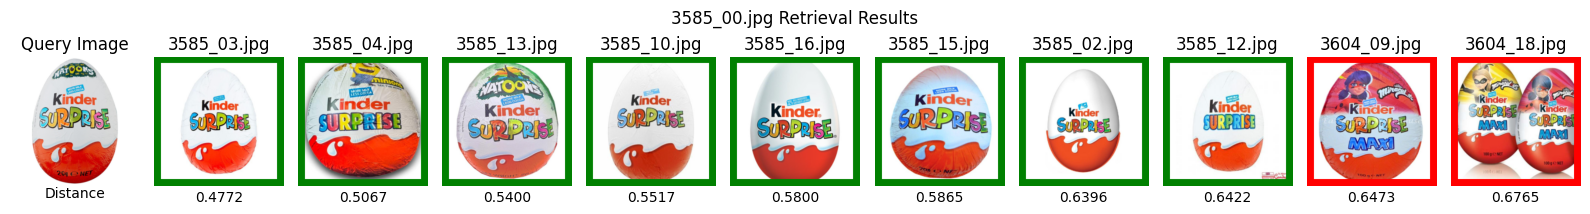

In [36]:
%matplotlib inline

import os
import shutil

import torch
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

query_img_name = 'data/custom/uncropped/3585_00.jpg'
data_base_name = 'results/01 recall scratch/custom_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'
# data_base_name = 'results/02 recall fine-tuning/custom_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'
retrieval_num = 10
data_name = data_base_name.split('_')[0]

data_base = torch.load('{}'.format(data_base_name))

if query_img_name not in data_base['test_images']:
    raise FileNotFoundError('{} not found'.format(query_img_name))
query_index = data_base['test_images'].index(query_img_name)
query_image = Image.open(query_img_name).convert('RGB').resize((224, 224), resample=Image.BILINEAR)
query_label = torch.tensor(data_base['test_labels'][query_index])
query_feature = data_base['test_features'][query_index]

gallery_images = data_base['{}_images'.format('test' if data_name != 'isc' else 'gallery')]
gallery_labels = torch.tensor(data_base['{}_labels'.format('test' if data_name != 'isc' else 'gallery')])
gallery_features = data_base['{}_features'.format('test' if data_name != 'isc' else 'gallery')]

dist_matrix = torch.cdist(query_feature.unsqueeze(0).unsqueeze(0), gallery_features.unsqueeze(0)).squeeze()
if data_name != 'isc':
    dist_matrix[query_index] = float('inf')
idx = dist_matrix.topk(k=retrieval_num, dim=-1, largest=False)[1]

result_path = 'results/{}'.format(query_img_name.split('/')[-1].split('.')[0])
if os.path.exists(result_path):
    shutil.rmtree(result_path)
os.mkdir(result_path)
query_image.save('{}/query_img.jpg'.format(result_path))

# 이미지 출력 관련 코드
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(16, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs[0].imshow(query_image)
axs[0].set_title(f'Query Image')
axs[0].text(112, 223, 'Distance', verticalalignment='top' , horizontalalignment='center')
axs[0].axis('off')

print("number \t image_path \t\t\t\t distance")

for num, index in enumerate(idx):
    retrieval_image = Image.open(gallery_images[index.item()]).convert('RGB') \
        .resize((224, 224), resample=Image.BILINEAR)
    draw = ImageDraw.Draw(retrieval_image)
    retrieval_label = gallery_labels[index.item()]
    retrieval_status = (retrieval_label == query_label).item()
    retrieval_dist = dist_matrix[index.item()].item()
    if retrieval_status:
        draw.rectangle((0, 0, 223, 223), outline='green', width=12)
    else:
        draw.rectangle((0, 0, 223, 223), outline='red', width=12)
    retrieval_image.save('{}/retrieval_img_{}_{}.jpg'.format(result_path, num + 1, '%.4f' % retrieval_dist))
    
    # 이미지 출력 관련 코드
    axs[num + 1].imshow(retrieval_image)
    axs[num + 1].set_title(f'{os.path.basename(gallery_images[index.item()])}')
    axs[num + 1].text(112, 230, '%.4f' % retrieval_dist, verticalalignment='top' , horizontalalignment='center')
    axs[num + 1].axis('off')

    print("{} \t {} \t {}".format(num + 1, gallery_images[index.item()], '%.4f' % retrieval_dist))

# 그래프를 출력합니다.
plt.suptitle(f'{os.path.basename(query_img_name)} Retrieval Results')
plt.tight_layout()
# plt.savefig('test.png')
plt.show()